Cài đặt các thư viện ràng buộc

In [7]:
!pip install pandas matplotlib scikit-learn numpy seaborn imbalanced-learn

Import các thư viện cần thiết

In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from imblearn.over_sampling import SMOTE

Đọc dữ liệu

In [9]:
df = pd.read_csv(r'.\parkinsons\parkinsons.data')
print(df.shape)
df

(195, 24)


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

Kiểm tra và xóa các giá trị trùng lặp

In [11]:
duplicates = df.duplicated()
print("Số lượng giá trị trùng lặp:", duplicates.sum())
print(duplicates)
df = df.drop_duplicates()
df.info()

Số lượng giá trị trùng lặp: 0
0      False
1      False
2      False
3      False
4      False
       ...  
190    False
191    False
192    False
193    False
194    False
Length: 195, dtype: bool
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    

Kiểm tra cân bằng dữ liệu

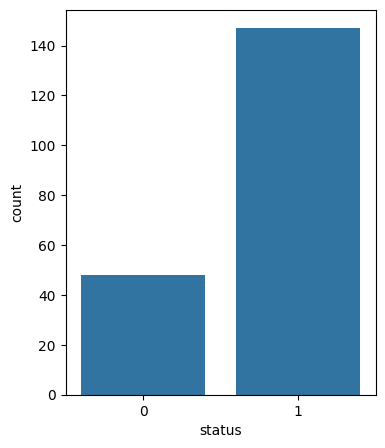

In [12]:
plt.figure(figsize=(4,5))
sns.countplot(x='status', data=df)
plt.show()

Các thuộc tính của tập dữ liệu

In [13]:
feature_names = df.columns[:].tolist()
feature_names.remove('name')
feature_names.remove('status')
print(feature_names)

['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']


Tách ra tập thuộc tính và nhãn

In [19]:
X = df.drop(columns=['status','name'])
y = df['status']
print(X.shape, y.shape)

(195, 22) (195,)


Sinh thêm dữ liệu

In [20]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
df_balanced = pd.concat([X_resampled, y_resampled], axis=1)
print(df_balanced.shape)
df_balanced.info()

(294, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       294 non-null    float64
 1   MDVP:Fhi(Hz)      294 non-null    float64
 2   MDVP:Flo(Hz)      294 non-null    float64
 3   MDVP:Jitter(%)    294 non-null    float64
 4   MDVP:Jitter(Abs)  294 non-null    float64
 5   MDVP:RAP          294 non-null    float64
 6   MDVP:PPQ          294 non-null    float64
 7   Jitter:DDP        294 non-null    float64
 8   MDVP:Shimmer      294 non-null    float64
 9   MDVP:Shimmer(dB)  294 non-null    float64
 10  Shimmer:APQ3      294 non-null    float64
 11  Shimmer:APQ5      294 non-null    float64
 12  MDVP:APQ          294 non-null    float64
 13  Shimmer:DDA       294 non-null    float64
 14  NHR               294 non-null    float64
 15  HNR               294 non-null    float64
 16  RPDE              294 non-null    

Xem lại độ cân bằng của dữ liệu

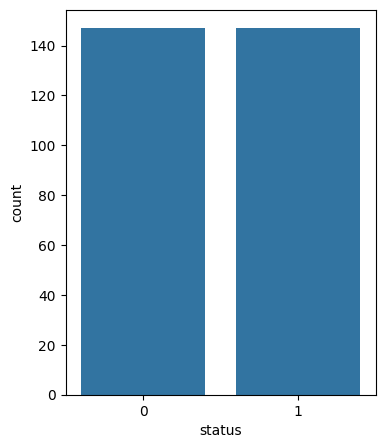

In [21]:
plt.figure(figsize=(4,5))
sns.countplot(x='status', data=df_balanced)
plt.show()

Lưu dữ liệu chưa chuẩn hóa

In [22]:
df_balanced.to_csv(r'.\parkinsons_balanced.csv', index=False)

Chuẩn hóa dữ liệu

In [23]:
scaler = StandardScaler()
for i in feature_names:
    column_data = df_balanced[i].values.reshape(-1, 1)
    scaled_column = scaler.fit_transform(column_data)
    df_balanced[i] = scaled_column.flatten()

df_balanced

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,-0.958318,-0.563022,-1.021263,0.560105,1.053429,0.330789,1.065913,0.329387,1.093462,1.079034,...,0.924561,0.038223,-0.410407,-0.682794,1.936798,1.138130,0.761671,-0.018666,1.218163,1
1,-0.907588,-0.668539,-0.289235,0.993537,1.373750,0.702047,1.660412,0.700637,2.155788,2.253774,...,1.995585,-0.042277,-0.866138,-0.242795,2.014099,1.815233,1.623071,0.488993,2.181968,1
2,-1.028052,-0.882438,-0.331925,1.186696,1.694071,1.010778,2.016274,1.011966,1.611950,1.407961,...,1.570998,-0.219264,-0.499775,-0.530203,2.119340,1.477537,1.318724,0.093090,1.768548,1
3,-1.028178,-0.799995,-0.335489,1.061849,1.694071,0.846643,1.668785,0.845229,1.768281,1.613541,...,1.758745,-0.206703,-0.501413,-0.478970,2.008880,1.776407,1.605084,0.266392,2.185421,1
4,-1.042125,-0.752310,-0.348895,1.737908,2.334712,1.444564,2.547974,1.445742,2.331434,2.007079,...,2.395438,-0.088522,-0.734191,-0.656813,2.086419,2.115688,0.363192,0.065494,2.659867,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,1.635668,0.576360,1.940391,-0.781342,-0.898878,-0.677123,-0.670206,-0.677201,-0.679813,-0.671586,...,-0.640060,-0.459131,0.572061,-0.514631,-1.330236,-0.933862,-1.413535,0.073625,-0.995774,0
290,-1.085581,-1.052066,-0.661954,-0.479024,-0.227853,-0.474123,-0.425753,-0.472902,-0.706440,-0.686151,...,-0.746679,-0.438586,0.764070,-0.538937,0.503204,-0.095343,-0.312301,-1.200870,-0.171114,0
291,0.541924,2.565988,-0.989560,0.354248,0.033699,0.239373,0.286367,0.238092,-0.215957,-0.074414,...,-0.171749,1.297622,-0.752514,-0.243302,-1.156384,-0.601964,-0.077929,-0.461120,-0.616307,0
292,-0.961528,-0.055200,-0.472895,-0.059000,0.336052,-0.188028,0.031616,-0.188116,-0.361556,-0.374287,...,-0.459978,-0.303902,0.023122,1.243116,-0.395724,0.423966,0.205776,-0.446564,0.559913,0


Lưu dữ liệu đã chuẩn hóa

In [24]:
df_balanced.to_csv(r'.\parkinsons_balanced_scaler.csv', index=False)